In [4]:
# knn clasifier
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [6]:
filename = 'pima-indians-diabetes.data.csv'
names = [
    'preg', 'plas', 'pres', 'skin', 'test', 'mass', 'pedi', 'age', 'class'
]
df = read_csv(filename, names=names)

In [7]:
df.head()

,preg,plas,pres,skin,test,mass,pedi,age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [42]:
array=df.values
X=array[:,0:8]
Y=array[:,8]

In [43]:
kfold=KFold(n_splits=10)

In [54]:
model=KNeighborsClassifier(n_neighbors=14)
results=cross_val_score(model,X,Y,cv=kfold)
print(results.mean())

0.7564764183185235


## GridSearch for algorithm tuning

In [46]:
from sklearn.model_selection import GridSearchCV

In [49]:
k=np.array(range(1,40))
param_grid=dict(n_neighbors=k)
grid=GridSearchCV(estimator=model,param_grid=param_grid)
grid.fit(X,Y)

GridSearchCV(estimator=KNeighborsClassifier(n_neighbors=13),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [50]:
print(grid.best_score_)
print(grid.best_params_)

0.7578558696205755
{'n_neighbors': 14}


## visualization the CV result

In [55]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range=range(1, 41)
k_score=[]
#use iteration to calculate different k in model, then return the average accuracy based on the cross validation
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,Y,cv=5)
    k_score.append(score.mean())

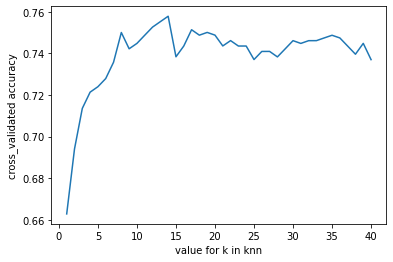

In [56]:
#plot to see clearly
plt.plot(k_range,k_score)
plt.xlabel('value for k in knn')
plt.ylabel('cross_validated accuracy')
plt.show()